In [50]:
import numpy as np

import sklearn as sk
import math
import statistics
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from statsmodels.formula.api import logit
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler 
from imblearn.under_sampling import ClusterCentroids
from sklearn import tree

In [1]:
n=7
def fizzbuzz(n):
    result = []
    for num in range(1, n+1):
        if num % 3 == 0 and num % 5 == 0:
            result.append((num, 'fizzbuzz'))
        elif num % 3 == 0:
            result.append((num, 'fizz'))
        elif num % 5 == 0:
            result.append((num, 'buzz'))
        else:
            result.append(num)
    return result

print(fizzbuzz(n))

[1, 2, (3, 'fizz'), 4, (5, 'buzz'), (6, 'fizz'), 7]


In [72]:
diabetes_df=pd.read_csv('diabetes.csv')

In [107]:
X= diabetes_df.drop('Outcome', axis=1)
y=diabetes_df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=32, stratify=y)

In [204]:
# decision tree classifier
# deep and complex trees tend to overfit, so we want to generalize and have reasonably simple trees as much as possible
model = tree.DecisionTreeClassifier(max_depth = 4, random_state=32, ccp_alpha=0.00888)

In [205]:
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

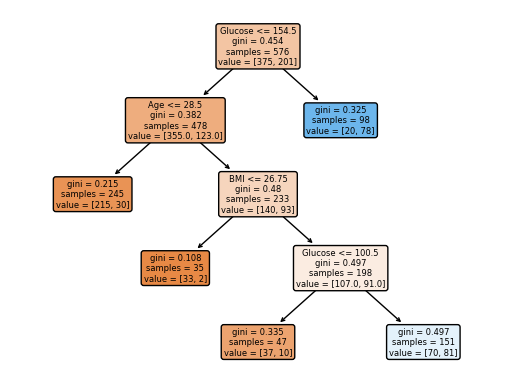

<Figure size 640x480 with 0 Axes>

In [206]:
tree.plot_tree(model, feature_names=list(X.columns), filled=True, fontsize=6, rounded=True)

plt.show()
plt.savefig('tree.svg')

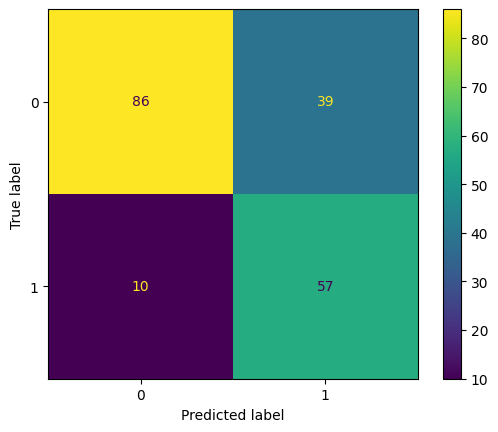

In [207]:
ros = RandomOverSampler(random_state=32)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
model.fit(X_resampled, y_resampled)
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [200]:
#recall
57/67

0.8507462686567164

In [171]:
#precision
57/96

0.59375